<a href="https://colab.research.google.com/github/SukirtiPandey/ai-playground-suki/blob/main/HousePricepredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 📂 Step 2: Load Sample Dataset
# For simplicity, we'll use a synthetic dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Preview data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


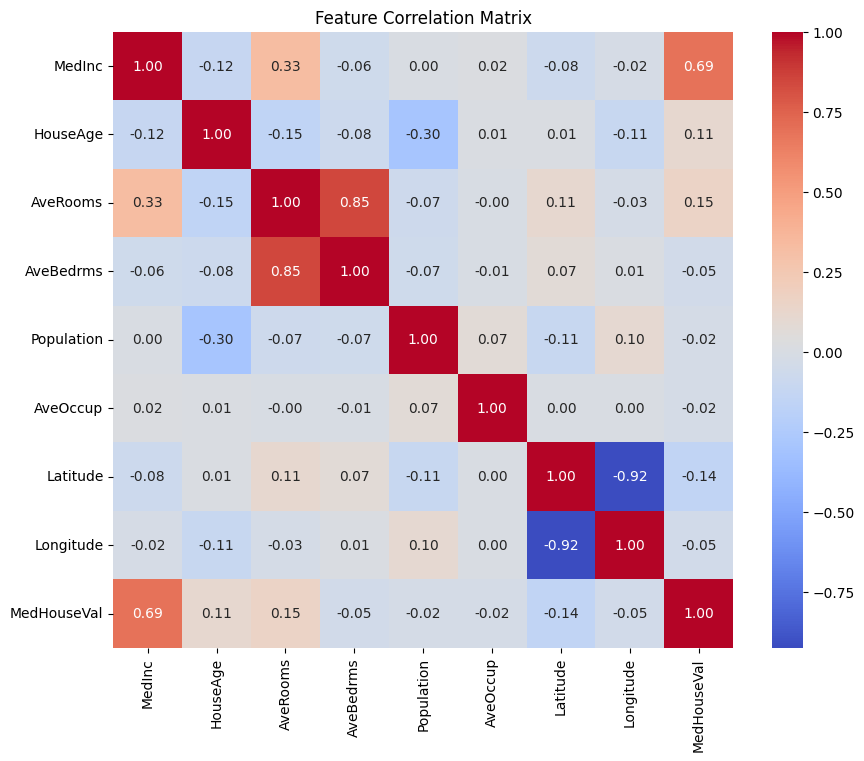

In [ ]:
# Check dataset structure
df.info()

# Check basic stats
df.describe()

# Check for missing values
df.isnull().sum()

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define input features (X) and target variable (y)
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print shapes to confirm
print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (16512, 8)
Test set: (4128, 8)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Step 1: Create the model
model = LinearRegression()

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = model.predict(X_test)

print("Actual:", y_test.values[:5])
print("Predicted:", y_pred[:5])
# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

Actual: [0.477   0.458   5.00001 2.186   2.78   ]
Predicted: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
RMSE: 0.7455813830127764
R² Score: 0.5757877060324508


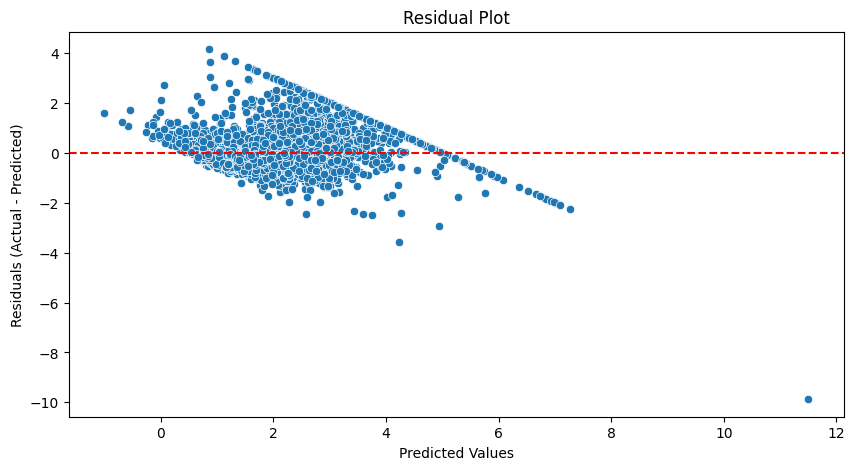

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Set plot size
plt.figure(figsize=(10, 5))

# Residual scatter plot
sns.scatterplot(x=y_pred, y=residuals)

# Horizontal line at 0 error
plt.axhline(y=0, color='red', linestyle='--')

# Titles and labels
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")

plt.show()